In [1]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

# USDA Crop Yield

In [2]:
# YIELD DATA
# Import USDA_tomato_yield_data
df_yield = pd.read_csv("USDA_yield_county_ton_per_acre_1973-2017.csv", 
                       na_values="NAN", low_memory = False) 
df_yield.tail(5)

,,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
422,SURVEY,2012,YEAR,NaN,COUNTY,CALIFORNIA,6,SAN JOAQUIN VALLEY,51,FRESNO,...,NaN,NaN,0,NaN,TOMATOES,"TOMATOES, IN THE OPEN, PROCESSING - YIELD, MEA...",TOTAL,NOT SPECIFIED,55.26,NaN
423,SURVEY,2012,YEAR,NaN,COUNTY,CALIFORNIA,6,SAN JOAQUIN VALLEY,51,KERN,...,NaN,NaN,0,NaN,TOMATOES,"TOMATOES, IN THE OPEN, PROCESSING - YIELD, MEA...",TOTAL,NOT SPECIFIED,55.92,NaN
424,SURVEY,2013,YEAR,NaN,COUNTY,CALIFORNIA,6,SAN JOAQUIN VALLEY,51,MERCED,...,NaN,NaN,0,NaN,TOMATOES,"TOMATOES, IN THE OPEN, PROCESSING - YIELD, MEA...",TOTAL,NOT SPECIFIED,56.77,NaN
425,SURVEY,2010,YEAR,NaN,COUNTY,CALIFORNIA,6,CENTRAL COAST,40,SAN BENITO,...,NaN,NaN,0,NaN,TOMATOES,"TOMATOES, IN THE OPEN, PROCESSING - YIELD, MEA...",TOTAL,NOT SPECIFIED,64.00,NaN
426,SURVEY,2010,YEAR,NaN,COUNTY,CALIFORNIA,6,SAN JOAQUIN VALLEY,51,OTHER (COMBINED) COUNTIES,...,NaN,NaN,0,NaN,TOMATOES,"TOMATOES, IN THE OPEN, PROCESSING - YIELD, MEA...",TOTAL,NOT SPECIFIED,67.00,NaN


In [3]:
df_yield= df_yield[df_yield['Year']>=2010] 
df_yield.tail()

,,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
422,SURVEY,2012,YEAR,NaN,COUNTY,CALIFORNIA,6,SAN JOAQUIN VALLEY,51,FRESNO,...,NaN,NaN,0,NaN,TOMATOES,"TOMATOES, IN THE OPEN, PROCESSING - YIELD, MEA...",TOTAL,NOT SPECIFIED,55.26,NaN
423,SURVEY,2012,YEAR,NaN,COUNTY,CALIFORNIA,6,SAN JOAQUIN VALLEY,51,KERN,...,NaN,NaN,0,NaN,TOMATOES,"TOMATOES, IN THE OPEN, PROCESSING - YIELD, MEA...",TOTAL,NOT SPECIFIED,55.92,NaN
424,SURVEY,2013,YEAR,NaN,COUNTY,CALIFORNIA,6,SAN JOAQUIN VALLEY,51,MERCED,...,NaN,NaN,0,NaN,TOMATOES,"TOMATOES, IN THE OPEN, PROCESSING - YIELD, MEA...",TOTAL,NOT SPECIFIED,56.77,NaN
425,SURVEY,2010,YEAR,NaN,COUNTY,CALIFORNIA,6,CENTRAL COAST,40,SAN BENITO,...,NaN,NaN,0,NaN,TOMATOES,"TOMATOES, IN THE OPEN, PROCESSING - YIELD, MEA...",TOTAL,NOT SPECIFIED,64.00,NaN
426,SURVEY,2010,YEAR,NaN,COUNTY,CALIFORNIA,6,SAN JOAQUIN VALLEY,51,OTHER (COMBINED) COUNTIES,...,NaN,NaN,0,NaN,TOMATOES,"TOMATOES, IN THE OPEN, PROCESSING - YIELD, MEA...",TOTAL,NOT SPECIFIED,67.00,NaN


In [4]:
df_yield.State.unique()

array(['CALIFORNIA'], dtype=object)

In [5]:
df_yield.County.unique()

array(['SOLANO', 'YOLO', 'SAN BENITO', 'SUTTER', 'STANISLAUS', 'MADERA',
       'OTHER (COMBINED) COUNTIES', 'SACRAMENTO', 'COLUSA', 'SAN JOAQUIN',
       'KERN', 'MERCED', 'CONTRA COSTA', 'FRESNO', 'KINGS'], dtype=object)

In [6]:
df_yield.shape

(112, 21)

# Scholle Bag Sales

In [71]:
df_bag_sales = pd.read_csv("Sales_data_for_Capstone_Project_-_Student_Version_-_v3_CLEAN.csv", 
                       na_values="NAN", low_memory = False) 
df_bag_sales= df_bag_sales[df_bag_sales['FiscalYear']>=2010]
#df_bag_sales.tail()
df_bag_sales.Ship_to_State_clean.unique()

array(['CA', 'MO', 'VA', 'PA', 'TX', 'IA', 'FL', 'AZ', 'WA', 'NM', 'KS',
       'HI', 'CO', 'IL', 'NJ', 'NY', 'MD', 'OH', 'MI', 'MN', 'GA', 'OR',
       'ME', 'TN', 'LA', 'WI', 'NE', 'ID', 'DE', 'NC', 'NV', 'KY'],
      dtype=object)

In [72]:
df_bag_sales= df_bag_sales[df_bag_sales['Ship_to_State_clean']=='CA'] 
df_bag_sales = df_bag_sales[df_bag_sales.FiscalYear != 2019]
df_bag_sales.tail()

,fiscalquartername,FiscalPeriod,FiscalYear,Company,Top_Most_BP,BusinessPartner,Item_Number,Item_Description,Ship_to_State,Ship_to_City,...,Budget_Qty,Forecast_Qty,Line_of_Business,Ship_to_State_clean,is_domestic,planned_delivery_year,planned_delivery_month_abbr,planned_delivery_month_num,planned_delivery_day_of_week_abbr,planned_delivery_day_of_week_num
5338,"Fiscal Quarter 4, 2018",201812,2018,"613 (Merced, CA)",DEL MONTE CORPORATION (GPC000003),Del Monte Corporation (CUS000291),201518,BS 1200 APPHM 5100/INS&CAP CTR,CA,Hanford,...,0.0,NaN,TOMATO (PROCESSED FRUIT TOMATO),CA,True,2018,Sep,9,Fri,6
5339,"Fiscal Quarter 4, 2018",201812,2018,"613 (Merced, CA)",DEL MONTE CORPORATION (GPC000003),Del Monte Corporation (CUS000291),206463,BS 0012 AVHV 5100/5100/INSRT,CA,Hanford,...,0.0,NaN,TOMATO (PROCESSED FRUIT TOMATO),CA,True,2018,Sep,9,Fri,6
5340,"Fiscal Quarter 4, 2018",201812,2018,"613 (Merced, CA)",Golden Valley Grape Juice & Wine (CUS008650),Golden Valley Grape Juice & Wine (CUS008650),200301,BS 0220 APHM 1F 800X/800,CA,Madera,...,150.0,1200.0,PFOTHR (PROCESSED FRUIT - OTHERS),CA,True,2018,Sep,9,Thurs,5
5341,"Fiscal Quarter 4, 2018",201812,2018,"613 (Merced, CA)",MORNING STAR PACKAGING COMPANY (GPC000004),Liberty Packing Company (CUS003536),206463,BS 0012 AVHV 5100/5100/INSRT,CA,Los Banos,...,1500.0,NaN,TOMATO (PROCESSED FRUIT TOMATO),CA,True,2018,Sep,9,Mon,2
5342,"Fiscal Quarter 4, 2018",201812,2018,"613 (Merced, CA)",MORNING STAR PACKAGING COMPANY (GPC000004),MORNING STAR PACKING COMPANY (CUS000469),201518,BS 1200 APPHM 5100/INS&CAP CTR,CA,Williams,...,64000.0,63000.0,TOMATO (PROCESSED FRUIT TOMATO),CA,True,2018,Sep,9,Tues,3


In [73]:
df_bag_sales.shape

(2502, 25)

In [74]:
df_bag_sales.rename(columns={'FiscalYear': 'Year', 'Ship_to_State_clean': 'State'}, inplace=True)

In [75]:
df_bag_sales.Ship_to_City.unique()

array(['Los Banos', 'Lemoore', 'Fresno', 'City of Industry', 'OAKDALE',
       'Arvin', 'Oxnard', 'SOUTH GATE', 'Dixon', 'Hanford', 'Escalon',
       'Irwindale', 'Huron', 'Bakersfield', 'STOCKTON', 'HELM',
       'HAYWARD                       ', 'Buttonwillow', 'Corcoran',
       'Modesto', 'WILLIAMS', 'Williams', 'Riverbank', 'Ontario',
       'GRIDLEY', 'Madera', 'WASCO', 'FRESNO', 'Del Rey',
       'South San Francisco', 'SAN DIEGO', 'ACAMPO', 'Hayward',
       'Los Angeles', 'SAN LEANDRO', 'MODESTO                       ',
       'OTAY MESA, CA', 'YORBA LINDA                   ', 'Woodland',
       'Gardena', 'Riverbank                     ',
       'STOCKTON                      ', 'TULARE', 'Shafter',
       'Tijuana, Baja, CA', 'SO. SAN FRANCISCO', 'OXNARD', 'MERCED',
       'WALNUT CREEK                  '], dtype=object)

In [76]:
def f(x):
    x = x['Ship_to_City']
    return {
        'Los Banos': 'MERCED',
        'Lemoore': 'KINGS',
        'Fresno' : 'FRESNO',
        'City of Industry': 'OTHER (COMBINED) COUNTIES', # Los Angeles County
        'OAKDALE': 'STANISLAUS',
        'Arvin' : 'KERN',
        'Oxnard': 'OTHER (COMBINED) COUNTIES', # Ventura County
        'SOUTH GATE': 'OTHER (COMBINED) COUNTIES', # Los Angeles County
        'Dixon' : 'SOLANO',
        'Hanford': 'KINGS',
        'Escalon': 'SAN JOAQUIN', 
        'Irwindale' : 'OTHER (COMBINED) COUNTIES', # Los Angeles County
        'Huron': 'FRESNO',
        'Bakersfield': 'KERN',
        'STOCKTON' : 'SAN JOAQUIN',
        'HELM': 'FRESNO', 
        'HAYWARD                       ': 'OTHER (COMBINED) COUNTIES', # Alameda County
        'Buttonwillow' : 'KERN',
        'Corcoran': 'KINGS', 
        'Modesto': 'STANISLAUS', 
        'WILLIAMS' : 'COLUSA',
        'Williams': 'COLUSA',
        'Riverbank': 'STANISLAUS', 
        'Ontario' : 'OTHER (COMBINED) COUNTIES', # San Bernardino County
        'GRIDLEY': 'OTHER (COMBINED) COUNTIES', # Butte COUNTY
        'Madera': 'MADERA',
        'WASCO' : 'KERN',
        'FRESNO': 'FRESNO', 
        'Del Rey': 'FRESNO',
        'South San Francisco' : 'OTHER (COMBINED) COUNTIES', # San Mateo County
        'SAN DIEGO': 'OTHER (COMBINED) COUNTIES', # SAN DIEGO County
        'ACAMPO': 'SAN JOAQUIN', 
        'Hayward' : 'OTHER (COMBINED) COUNTIES', # Alameda County
        'Los Angeles': 'OTHER (COMBINED) COUNTIES', # Los Angeles County
        'Escalon': 'SAN JOAQUIN', 
        'Irwindale' : 'OTHER (COMBINED) COUNTIES', # Los Angeles County
        'SAN LEANDRO': 'OTHER (COMBINED) COUNTIES', # Alameda County
        'MODESTO                       ': 'STANISLAUS',
        'OTAY MESA, CA' : 'OTHER (COMBINED) COUNTIES', # SAN DIEGO County
        'YORBA LINDA                   ': 'OTHER (COMBINED) COUNTIES', # Orange County
        'Woodland': 'YOLO', 
        'TULARE' : 'OTHER (COMBINED) COUNTIES', # Tulare County
        'Gardena': 'OTHER (COMBINED) COUNTIES', # Los Angeles County
        'Riverbank                     ': 'STANISLAUS', 
        'STOCKTON                      ' : 'SAN JOAQUIN',
        'Shafter': 'KERN',
        'Tijuana, Baja, CA': 'OTHER (COMBINED) COUNTIES', # Tijuana, Baja County
        'SO. SAN FRANCISCO' : 'OTHER (COMBINED) COUNTIES', # San Mateo County
        'OXNARD': 'OTHER (COMBINED) COUNTIES', # Ventura County
        'MERCED': 'MERCED',
        'WALNUT CREEK                  ' : 'CONTRA COSTA'    
    }[x]

In [77]:
df_bag_sales['County'] = df_bag_sales.apply(f, axis=1)

In [78]:
df_bag_sales.head()

,fiscalquartername,FiscalPeriod,Year,Company,Top_Most_BP,BusinessPartner,Item_Number,Item_Description,Ship_to_State,Ship_to_City,...,Forecast_Qty,Line_of_Business,State,is_domestic,planned_delivery_year,planned_delivery_month_abbr,planned_delivery_month_num,planned_delivery_day_of_week_abbr,planned_delivery_day_of_week_num,County
0,"Fiscal Quarter 1, 2011",201101,2011,"613 (Merced, CA)",MORNING STAR PACKAGING COMPANY (GPC000004),Liberty Packing Company (CUS003536),206463,BS 0012 AVHV 5100/5100/INSRT,CA,Los Banos,...,0.0,TOMATO (PROCESSED FRUIT TOMATO),CA,True,2010,Oct,10,Tues,3,MERCED
1,"Fiscal Quarter 1, 2011",201101,2011,"613 (Merced, CA)","OLAM AMERICAS, INC (CUS008742)",OLAM TOMATO PROCESSORS INC (CUS008743),200304,BS 0220 APPHM 1F 800X/800,CA,Lemoore,...,NaN,TOMATO (PROCESSED FRUIT TOMATO),CA,True,2010,Oct,10,Tues,3,KINGS
2,"Fiscal Quarter 1, 2011",201102,2011,"611 (Northlake, IL)","Lyons Magnus, Inc. (CUS003578)",Lyons Magnus (CUS004776),201613,BW 0010 APHM 900/7300 -OBS,CA,Fresno,...,NaN,PFOTHR (PROCESSED FRUIT - OTHERS),CA,True,2010,Nov,11,Fri,6,FRESNO
3,"Fiscal Quarter 1, 2011",201102,2011,"613 (Merced, CA)",LEE KUM KEE (GPC000067),"Lee Kum Kee Usa Foods, Inc. (CUS000434)",200212,BW 0020 PHM 1F 800/800R,CA,City of Industry,...,0.0,PFOTHR (PROCESSED FRUIT - OTHERS),CA,True,2010,Nov,11,Tues,3,OTHER (COMBINED) COUNTIES
5,"Fiscal Quarter 1, 2011",201101,2011,"613 (Merced, CA)",CONAGRA (GPC000027),Conagra Grocery Products Company (CUS000613),201518,BS 1200 APPHM 5100/INS&CAP CTR,CA,OAKDALE,...,0.0,TOMATO (PROCESSED FRUIT TOMATO),CA,True,2010,Oct,10,Thurs,5,STANISLAUS


In [79]:
df_bag_sales.County.unique()

array(['MERCED', 'KINGS', 'FRESNO', 'OTHER (COMBINED) COUNTIES',
       'STANISLAUS', 'KERN', 'SOLANO', 'SAN JOAQUIN', 'COLUSA', 'MADERA',
       'YOLO', 'CONTRA COSTA'], dtype=object)

In [80]:
df_bag_sales.shape

(2502, 26)

In [81]:
df_bag_sales.to_csv('Scholle_data_cleaned_data')

# Merging the data

In [82]:
df_bag_sales_Counties = df_bag_sales[['Year','State','County','Quantity']]
df_bag_sales_Counties = df_bag_sales_Counties.groupby(['Year','State', 'County']).sum().reset_index()
df_bag_sales_Counties.tail(5)

,Year,State,County,Quantity
91,2018,CA,OTHER (COMBINED) COUNTIES,676720
92,2018,CA,SAN JOAQUIN,110090
93,2018,CA,SOLANO,87283
94,2018,CA,STANISLAUS,40776
95,2018,CA,YOLO,43160


In [83]:
df_bag_sales_Counties.shape

(96, 4)

In [84]:
df_yield.State.replace(['CALIFORNIA'], ['CA'], inplace=True)
df_yield_Counties = df_yield[['Year','State', 'County','Value']]
df_yield_Counties.tail()

,Year,State,County,Value
422,2012,CA,FRESNO,55.26
423,2012,CA,KERN,55.92
424,2013,CA,MERCED,56.77
425,2010,CA,SAN BENITO,64.00
426,2010,CA,OTHER (COMBINED) COUNTIES,67.00


In [85]:
df_yield_Counties.shape

(112, 4)

In [86]:
df = pd.merge(df_yield_Counties, df_bag_sales_Counties, how='outer')
df = df[~df.Year.isin(['2010','2011','2012','2013','2014','2015'])]
df = df[~df.County.isin(['SUTTER','SAN BENITO','SACRAMENTO','OTHER (COMBINED) COUNTIES','CONTRA COSTA','MADERA'])]
df = df.sort_values(['Year'], ascending=[True])
df = df.sort_values(['County'], ascending=[0])
df.rename(columns={'Value': 'Yield', 'Quantity': 'Bag_Sales'}, inplace=True)
df

,Year,State,County,Yield,Bag_Sales
126,2018,CA,YOLO,NaN,43160.0
65,2016,CA,YOLO,46.90,20410.0
31,2017,CA,YOLO,43.08,34260.0
125,2018,CA,STANISLAUS,NaN,40776.0
13,2017,CA,STANISLAUS,39.62,34092.0
14,2016,CA,STANISLAUS,39.80,37721.0
61,2016,CA,SOLANO,46.43,91487.0
124,2018,CA,SOLANO,NaN,87283.0
24,2017,CA,SOLANO,41.63,84260.0
123,2018,CA,SAN JOAQUIN,NaN,110090.0


In [87]:
df = df[df.County != 'COLUSA']

In [88]:
df.shape

(24, 5)

In [89]:
df

,Year,State,County,Yield,Bag_Sales
126,2018,CA,YOLO,NaN,43160.0
65,2016,CA,YOLO,46.90,20410.0
31,2017,CA,YOLO,43.08,34260.0
125,2018,CA,STANISLAUS,NaN,40776.0
13,2017,CA,STANISLAUS,39.62,34092.0
14,2016,CA,STANISLAUS,39.80,37721.0
61,2016,CA,SOLANO,46.43,91487.0
124,2018,CA,SOLANO,NaN,87283.0
24,2017,CA,SOLANO,41.63,84260.0
123,2018,CA,SAN JOAQUIN,NaN,110090.0


In [90]:
yield_2018 = pd.read_csv("yield_2018.csv", na_values="NAN", low_memory = False) 
yield_2018 = yield_2018.apply(lambda x: x.astype(str).str.upper())
yield_2018 = yield_2018[['County','Yield_2018']]
yield_2018

,County,Yield_2018
0,YOLO,44.3
1,FRESNO,46.84
2,KERN,46.84
3,MERCED,47.78
4,KINGS,49.7
5,SAN JOAQUIN,44.18
6,SOLANO,44.18
7,STANISLAUS,44.93


In [91]:
df[df.Year == 2018]

,Year,State,County,Yield,Bag_Sales
126,2018,CA,YOLO,NaN,43160.0
125,2018,CA,STANISLAUS,NaN,40776.0
124,2018,CA,SOLANO,NaN,87283.0
123,2018,CA,SAN JOAQUIN,NaN,110090.0
121,2018,CA,MERCED,NaN,921322.0
119,2018,CA,KINGS,NaN,262165.0
118,2018,CA,KERN,NaN,250062.0
117,2018,CA,FRESNO,NaN,223140.0


In [92]:
df_2018 = pd.merge(yield_2018, df[df.Year == 2018], how='outer', on = 'County')
df_2018 = df_2018.drop(['Yield'], axis=1)
df_2018.rename(columns={'Yield_2018': 'Yield'}, inplace=True)
#df_2018.columns = ['Year','State','County','Yield','Bag_Sales']
df_2018

,County,Yield,Year,State,Bag_Sales
0,YOLO,44.3,2018,CA,43160.0
1,FRESNO,46.84,2018,CA,223140.0
2,KERN,46.84,2018,CA,250062.0
3,MERCED,47.78,2018,CA,921322.0
4,KINGS,49.7,2018,CA,262165.0
5,SAN JOAQUIN,44.18,2018,CA,110090.0
6,SOLANO,44.18,2018,CA,87283.0
7,STANISLAUS,44.93,2018,CA,40776.0


In [93]:
df = df[df.Year != 2018]
df

,Year,State,County,Yield,Bag_Sales
65,2016,CA,YOLO,46.90,20410.0
31,2017,CA,YOLO,43.08,34260.0
13,2017,CA,STANISLAUS,39.62,34092.0
14,2016,CA,STANISLAUS,39.80,37721.0
61,2016,CA,SOLANO,46.43,91487.0
24,2017,CA,SOLANO,41.63,84260.0
57,2016,CA,SAN JOAQUIN,45.83,114820.0
27,2017,CA,SAN JOAQUIN,42.35,103430.0
66,2016,CA,MERCED,47.74,840034.0
68,2017,CA,MERCED,47.95,780503.0


In [94]:
df_2018.round({'Yield': 2})
#df_2018.round(2)

,County,Yield,Year,State,Bag_Sales
0,YOLO,44.3,2018,CA,43160.0
1,FRESNO,46.84,2018,CA,223140.0
2,KERN,46.84,2018,CA,250062.0
3,MERCED,47.78,2018,CA,921322.0
4,KINGS,49.7,2018,CA,262165.0
5,SAN JOAQUIN,44.18,2018,CA,110090.0
6,SOLANO,44.18,2018,CA,87283.0
7,STANISLAUS,44.93,2018,CA,40776.0


In [95]:
df = df.append(df_2018, ignore_index=True)
df = df.round(2)
df = df[['State', 'County', 'Year', 'Yield', 'Bag_Sales']]
df.sort_values(by=['County'])

,State,County,Year,Yield,Bag_Sales
17,CA,FRESNO,2018,46.84,223140.0
15,CA,FRESNO,2016,50.03,266199.0
14,CA,FRESNO,2017,50.39,210705.0
13,CA,KERN,2017,51.33,240008.0
12,CA,KERN,2016,46.4,255438.0
18,CA,KERN,2018,46.84,250062.0
10,CA,KINGS,2016,54.74,287004.0
11,CA,KINGS,2017,51.88,264070.0
20,CA,KINGS,2018,49.7,262165.0
9,CA,MERCED,2017,47.95,780503.0


In [127]:
df.to_csv('Merged_data.csv')

# Cross Sectional Modelling

In [128]:
CS = pd.read_csv("Merged_data.csv", na_values="NAN", low_memory = False) 
CS_2018 = CS[CS.Year == 2018]
CS_2017_train = CS[CS.Year == 2017]
CS_2017_test = CS[CS.Year == 2017]
CS_2016 = CS[CS.Year == 2016]

### Train 

In [129]:
CS_2017_train.rename(columns={'Bag_Sales': 'Bag_Sales_2017'}, inplace=True)
CS_2016.rename(columns={'Bag_Sales': 'Bag_Sales_2016'}, inplace=True)
CS_2016 = CS_2016.drop(['Yield'], axis=1)
CS_2016 = CS_2016.drop(['Year'], axis=1)
CS_2017_train = CS_2017_train.drop(['Year'], axis=1)
CS_2017_train = CS_2017_train.drop(['Unnamed: 0'], axis=1)
CS_2016 = CS_2016.drop(['Unnamed: 0'], axis=1)

In [130]:
CS_merged_train = pd.merge(CS_2016, CS_2017_train, how='inner', on = ['County','State'])
CS_merged_train

,Bag_Sales_2016,County,State,Bag_Sales_2017,Yield
0,20410.0,YOLO,CA,34260.0,43.08
1,37721.0,STANISLAUS,CA,34092.0,39.62
2,91487.0,SOLANO,CA,84260.0,41.63
3,114820.0,SAN JOAQUIN,CA,103430.0,42.35
4,840034.0,MERCED,CA,780503.0,47.95
5,287004.0,KINGS,CA,264070.0,51.88
6,255438.0,KERN,CA,240008.0,51.33
7,266199.0,FRESNO,CA,210705.0,50.39


In [131]:
CS_merged_test.corr()

,Bag_Sales_2018,Yield,Bag_Sales_2017
Bag_Sales_2018,1.000000,0.572089,0.997921
Yield,0.572089,1.000000,0.617302
Bag_Sales_2017,0.997921,0.617302,1.000000


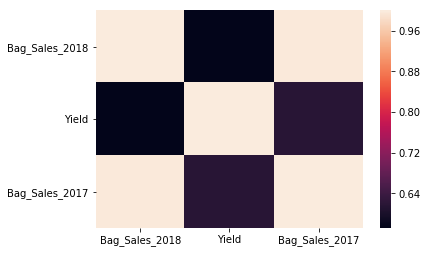

In [132]:
import seaborn as sns
corr = CS_merged_test.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Test

In [133]:
CS_2018.rename(columns={'Bag_Sales': 'Bag_Sales_2018'}, inplace=True)
CS_2017 = CS_2017_test.rename(columns={'Bag_Sales': 'Bag_Sales_2017'}, inplace=True)
#CS_2018 = CS_2018.rename(columns={'Yield': 'Yield_2018'}, inplace=True)
CS_2017_test = CS_2017_test.drop(['Yield'], axis=1)
CS_2017_test = CS_2017_test.drop(['Year'], axis=1)
CS_2018 = CS_2018.drop(['Year'], axis=1)
CS_2018 = CS_2018.drop(['Unnamed: 0'], axis=1)
CS_2017_test = CS_2017_test.drop(['Unnamed: 0'], axis=1)
CS_merged_test = pd.merge(CS_2018, CS_2017_test, how='inner', on = ['County','State'])
CS_merged_test

,Bag_Sales_2018,County,State,Yield,Bag_Sales_2017
0,43160.0,YOLO,CA,44.305,34260.0
1,223140.0,FRESNO,CA,46.837,210705.0
2,250062.0,KERN,CA,46.837,240008.0
3,921322.0,MERCED,CA,47.779,780503.0
4,262165.0,KINGS,CA,49.704,264070.0
5,110090.0,SAN JOAQUIN,CA,44.185,103430.0
6,87283.0,SOLANO,CA,44.185,84260.0
7,40776.0,STANISLAUS,CA,44.932,34092.0


In [134]:
CS_merged_test.corr()

,Bag_Sales_2018,Yield,Bag_Sales_2017
Bag_Sales_2018,1.000000,0.572089,0.997921
Yield,0.572089,1.000000,0.617302
Bag_Sales_2017,0.997921,0.617302,1.000000


# Modelling

# Best Model - Linear Regression

In [64]:
X_train = CS_merged_train[['Yield','Bag_Sales_2016']]
y_train = CS_merged_train['Bag_Sales_2017']
X_test = CS_merged_test[['Yield','Bag_Sales_2017']]
y_test = CS_merged_test['Bag_Sales_2018']
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
grid_param = {'fit_intercept' : [True, False],
              'normalize' : [True, False]}
grid_lg = GridSearchCV(lm, grid_param, cv=8, n_jobs=-1)
grid_lg.fit(X_train,y_train)

GridSearchCV(cv=8, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
y_pred = grid_lg.best_estimator_.predict(X_test)
y_pred_train = grid_lg.best_estimator_.predict(X_train)

In [78]:
def metrics(X_train, y_train, X_test, y_test, y_pred, y_pred_train):
    r_2 = r2_score(y_train, y_pred_train)
    print("R-squared train: " , r_2)
    r_2 = r2_score(y_test, y_pred)
    print("R-squared test: " , r_2)
    rmse = math.sqrt(mean_squared_error(y_test,y_pred))
    print("rmse: " , rmse)
    smape = 100 * (sum(abs(y_test-y_pred)/(abs(y_test)+abs(y_pred))))/len(y_test)
    print("smape: " , smape)
    p_bias = 100 * (sum(y_pred - y_test) / sum(y_test))
    print("percentage bias: " ,p_bias)
    print("Mean Accuracy: {}".format(sum(y_pred/y_test.values)))


In [79]:
y_pred_lg = y_pred

In [81]:
# Linear Regression 
metrics(X_train, y_train, X_test, y_test, y_pred, y_pred_train)

R-squared train:  0.9968707047894604
R-squared test:  0.9263213696707104
rmse:  73317.88485559318
smape:  10.096611658653794
percentage bias:  -17.45539721905288
Mean Accuracy: 6.559338648626386


# Residual Analysis

In [69]:
residuals = y_test - y_pred_lg
residuals.mean()

42285.65612466256

In [70]:
y_test

0     43160.0
1    223140.0
2    250062.0
3    921322.0
4    262165.0
5    110090.0
6     87283.0
7     40776.0
Name: Bag_Sales_2018, dtype: float64

In [71]:
# Linear Regression by making mean residual 0
y_pred_final = y_pred_lg + residuals.mean()
metrics(X_train, y_train, X_test, y_test, y_pred_final)

R-squared:  0.9508293676677069
rmse:  59895.20453095393
smape:  11.93816309594346
percentage bias:  3.0034943747861148e-15
Mean Accuracy: 10.010464779555706


In [51]:
residuals = y_test - y_pred_final
residuals.mean()

-7.275957614183426e-12

/Users/anupriya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


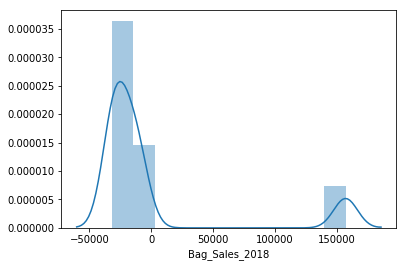

In [52]:
sns.distplot(residuals)
plt.show()

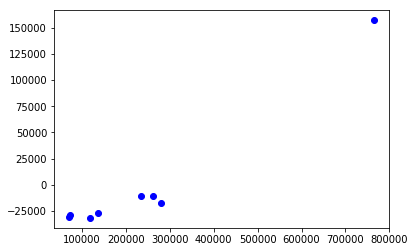

In [53]:
plt.plot(y_pred_final, residuals, 'bo')

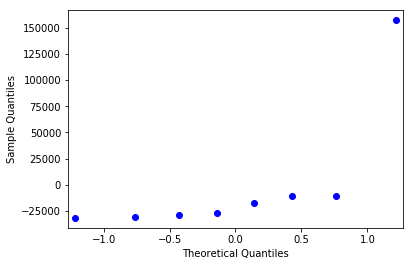

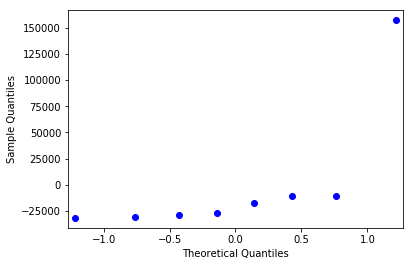

In [54]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals)

In [55]:
# Null hypothesis - homoskedastic
import statsmodels.api as sm
_, pval, __, f_pval = sm.stats.diagnostic.het_breuschpagan(residuals, X_test)
pval, f_pval 

(0.008293116029954358, 0.0021400958002011556)

In [56]:
print('Result: violates homoskedastic')

Result: violates homoskedastic


In [57]:
# Null hypothesis - skewness of the population that the sample was drawn from is the same as that of a corresponding normal distribution.
import scipy
scipy.stats.skewtest(residuals)

SkewtestResult(statistic=3.4627425227519377, pvalue=0.0005346997977083237)

In [58]:
print('Result: Skewed towards the right')

Result: Skewed towards the right


In [59]:
# Null hypothesis - kurtosis of the population from which the sample was drawn is that of the normal distribution
scipy.stats.kurtosistest(residuals)
# kurtosis statistic is possitive

/Users/anupriya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


KurtosistestResult(statistic=3.1021456678806234, pvalue=0.0019212339407365968)

In [60]:
print('Result: Distribution has heavier tails and a sharper peak than the normal distribution - Leptokurtic(Right kurtoisis)')

Result: Distribution has heavier tails and a sharper peak than the normal distribution - Leptokurtic(Right kurtoisis)


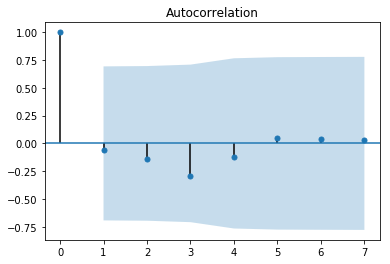

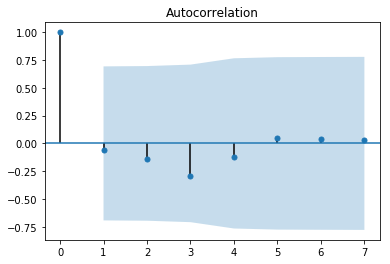

In [61]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)